# Appendix

# Import Packages

I imported seaborn, matplotlib, numpy and pandas

In [24]:
#imported seaborn; matplotlib
import matplotlib
import numpy as np
import pandas as pd
import os
import itertools
from math import sqrt
from scipy import stats as st
#import cvxopt

import sklearn 
from sklearn.preprocessing import StandardScaler # used for variable scaling data
from sklearn.preprocessing import MinMaxScaler as Scaler # used for variable scaling data
from sklearn.model_selection import train_test_split

import sklearn.linear_model 
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor # Random Forest package
from sklearn.ensemble import ExtraTreesRegressor # Extra Trees package
from sklearn.ensemble import GradientBoostingRegressor # Gradient Boosting package

from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import make_scorer, accuracy_score 

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

import statsmodels.api as sm

from matplotlib import pyplot as plt
from matplotlib import rc
import seaborn as sns
sns.set_style("whitegrid")
sns.set(style="whitegrid", color_codes=True)
plt.rc("font", size=14)

In [2]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

Read in data from CSV file

In [3]:
#import dataset
boston_df=pd.read_csv('/Users/gurjy/Downloads/jump-start-boston-housing-v001/boston.csv')

Get shape of data

In [4]:
#calculate shape
boston_df.shape

(506, 14)

See the initial data

In [5]:
boston_df.head()

,neighborhood,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,Nahant,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,Swampscott,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,Swanpscott,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,Marblehead,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,Marblehead,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


See the data types of columns

In [6]:
boston_df.dtypes

neighborhood     object
crim            float64
zn              float64
indus           float64
chas              int64
nox             float64
rooms           float64
age             float64
dis             float64
rad               int64
tax               int64
ptratio         float64
lstat           float64
mv              float64
dtype: object

Drop the not quantitative data

In [7]:
#Drop non numeric columns
boston_df = boston_df.drop('neighborhood', 1)

See the data again with column dropped

In [77]:
#see if column has been dropped
boston_df.head()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


Run the traditional statistics to summarize data

In [79]:
#check to see if there are typos and look at typical stats
boston_df.describe()

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat,mv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.528854
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.182176
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


See if there is any missing data

In [80]:
#look at data and check if there is NA values
boston_df.isnull().sum()

crim       0
zn         0
indus      0
chas       0
nox        0
rooms      0
age        0
dis        0
rad        0
tax        0
ptratio    0
lstat      0
mv         0
dtype: int64

See if there is any outliers in the data

<AxesSubplot:>

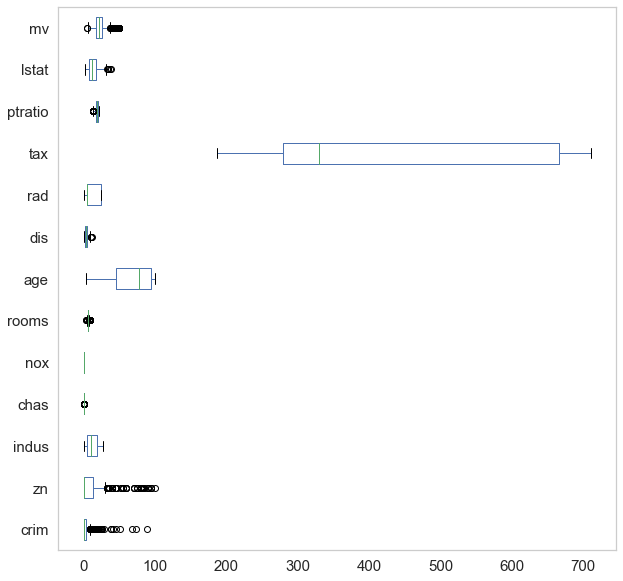

In [81]:
boston_df.boxplot(vert=False, figsize=(10,10), grid=False)

Make a histograms and see median values of house prices in each neigborhood

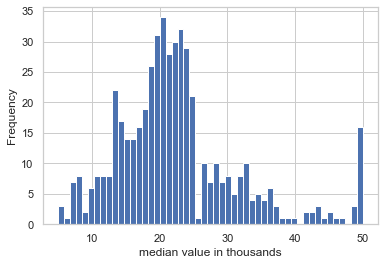

In [12]:
plt.hist(boston_df['mv'], bins = 51)
plt.xlabel('median value in thousands')
plt.ylabel('Frequency')
plt.show()

Wanted to see which data had linear shape

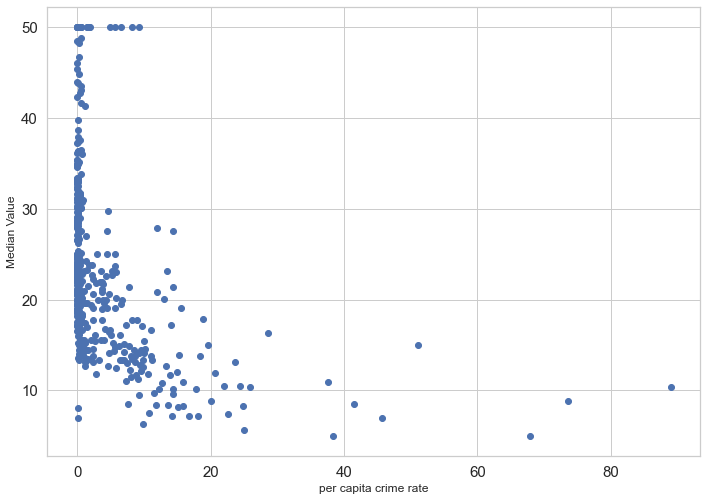

In [84]:
plt.plot(boston_df['crim'], boston_df['mv'], 'bo')
plt.xlabel('per capita crime rate')
plt.ylabel('Median Value')
plt.show()

Saw rooms column and saw a liner shape which means positive correlation

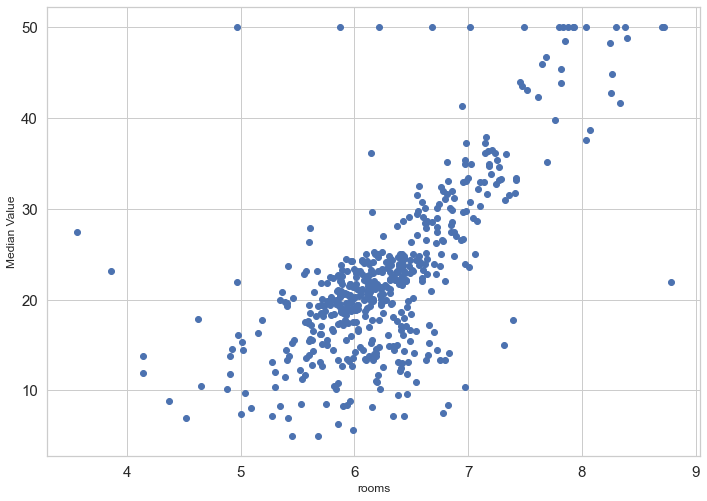

In [86]:
plt.plot(boston_df['rooms'], boston_df['mv'], 'bo')
plt.xlabel('rooms')
plt.ylabel('Median Value')
plt.show()

Do not see any strong correlation

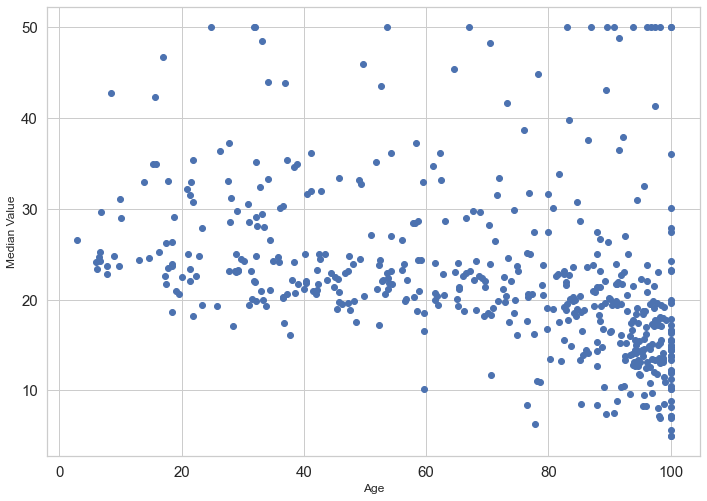

In [87]:
plt.plot(boston_df['age'], boston_df['mv'], 'bo')
plt.xlabel('Age')
plt.ylabel('Median Value')
plt.show()

I see initial data in graphs in this pairplot

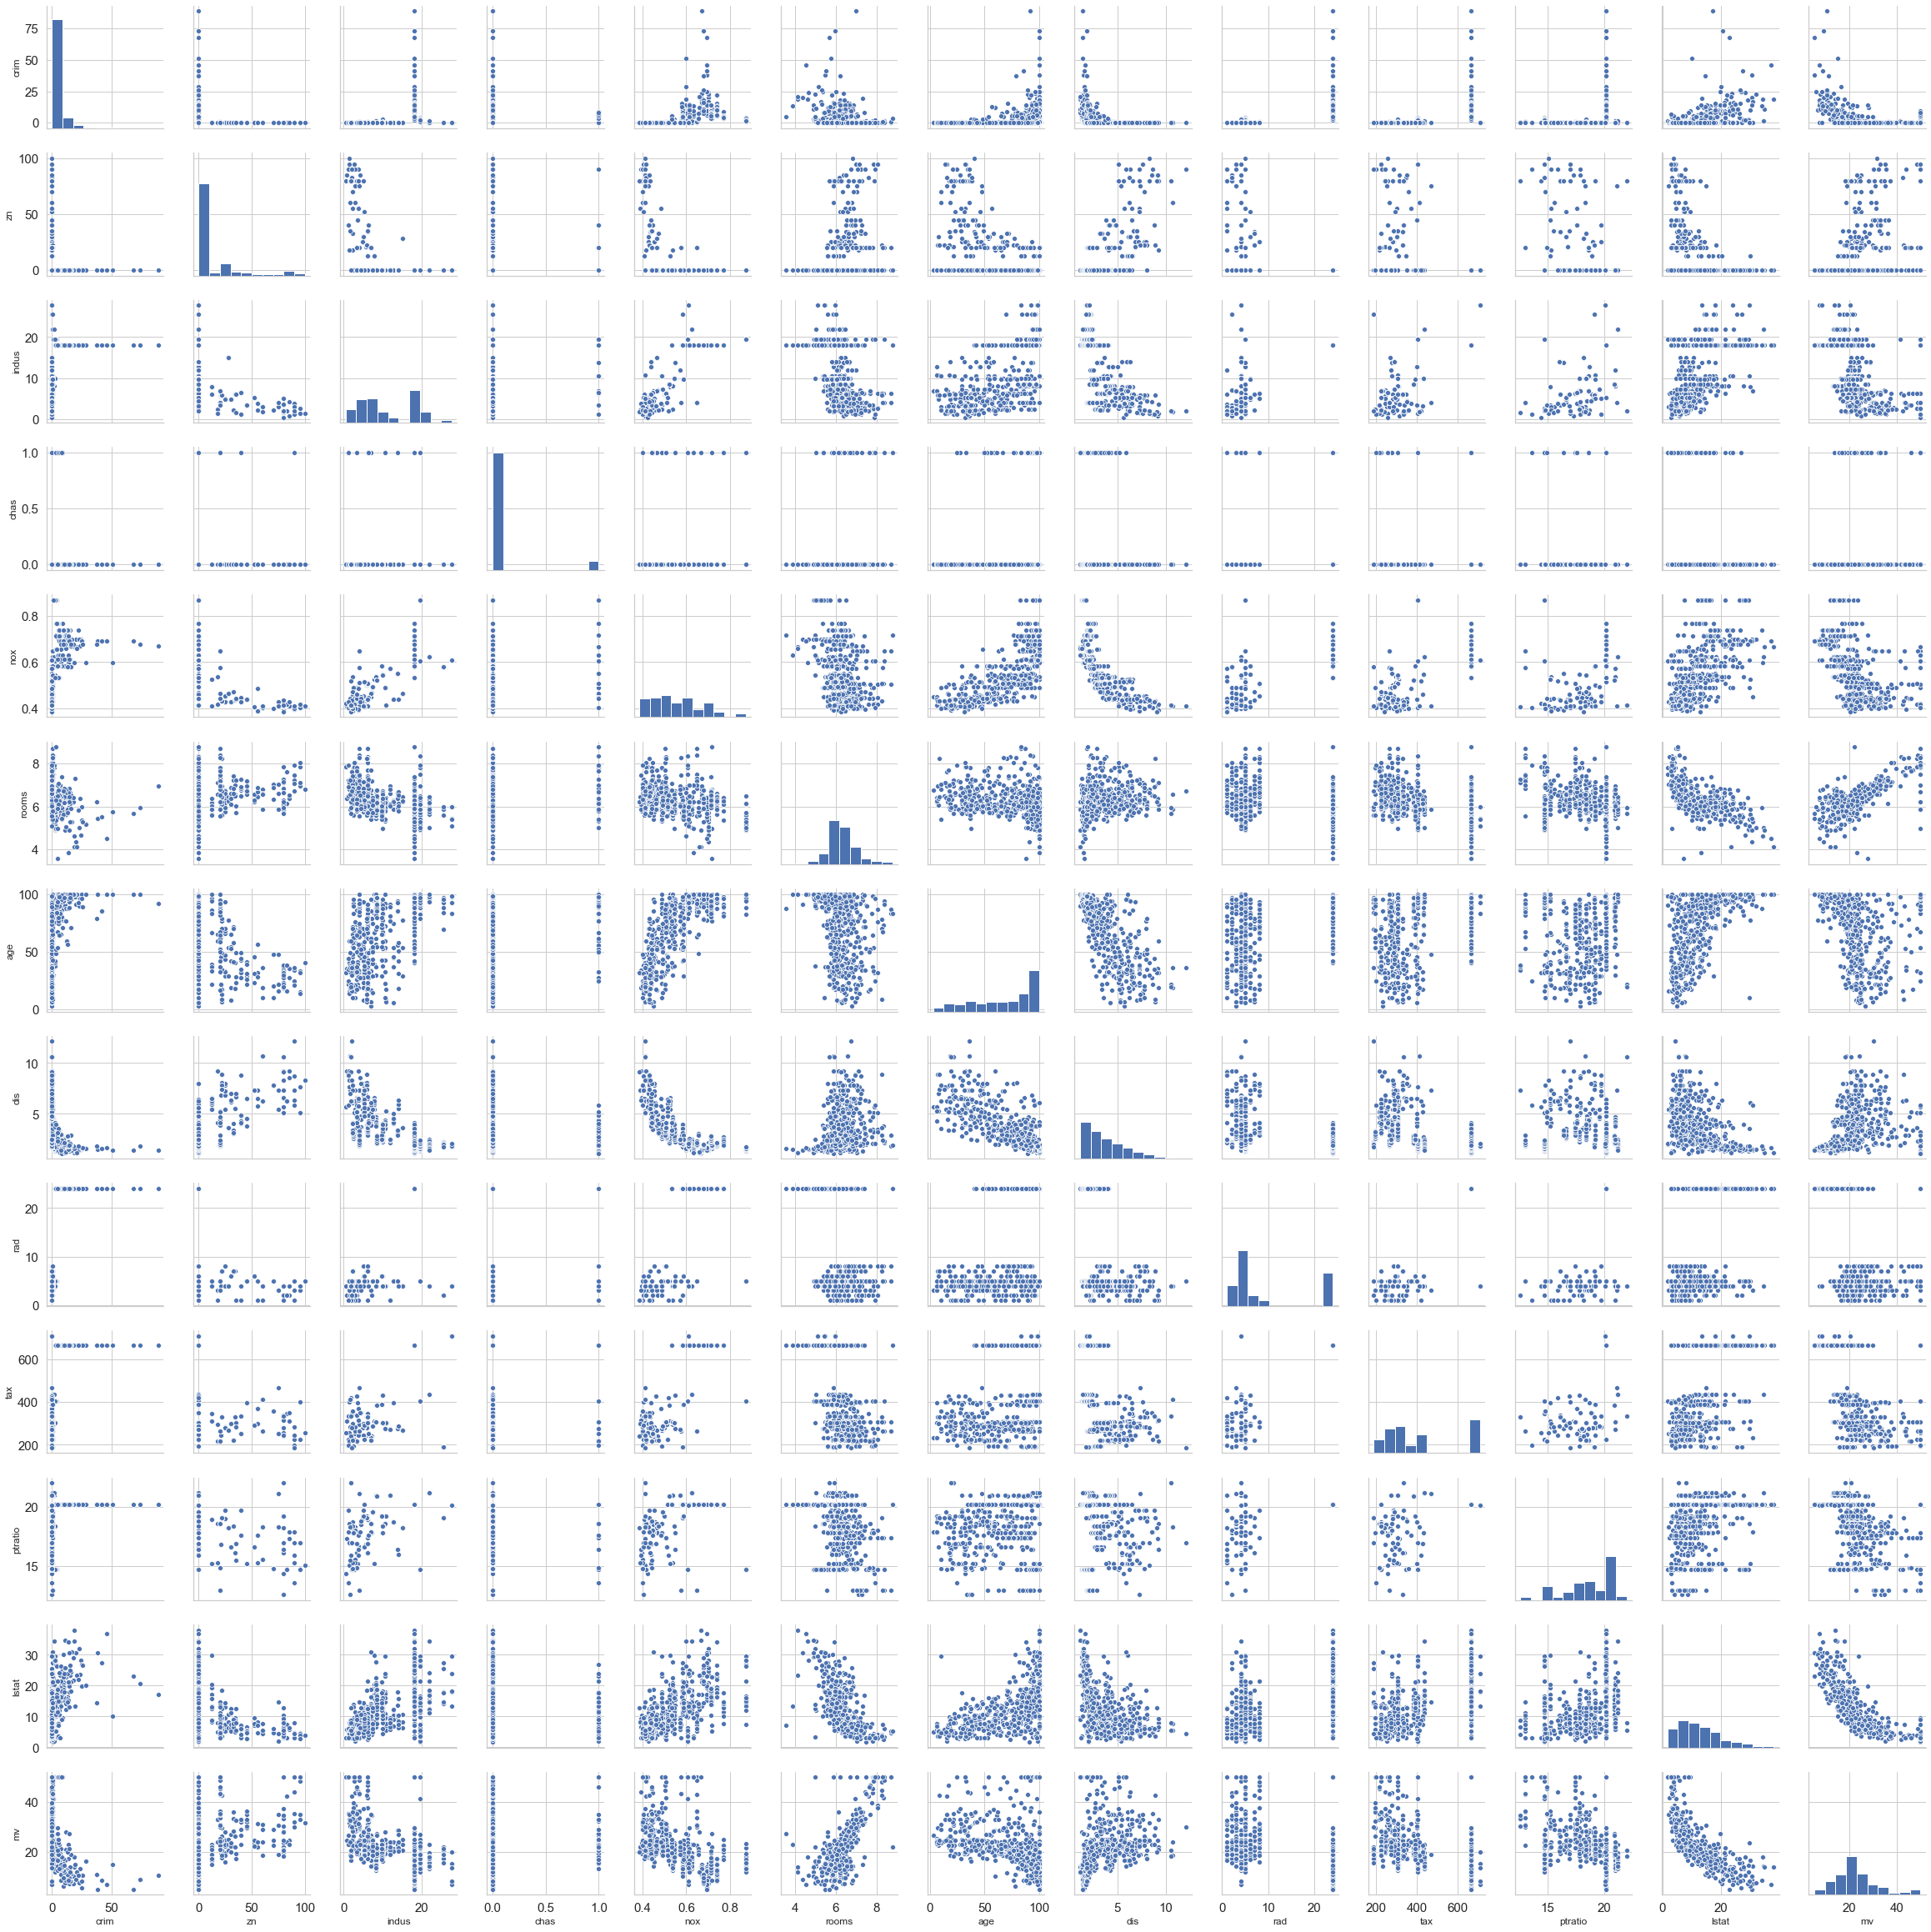

In [89]:
sns.pairplot(boston_df, diag_kind='hist')

Make copy of data

In [14]:
boston_df1=boston_df.copy()

Drop all columns except for column

In [15]:
#saves the column we want to predict
columns = ['crim','zn','indus','chas','nox','rooms','age','dis','rad','tax','ptratio','lstat']
boston_Target = boston_df1.drop(columns=columns)

In [16]:
boston_Target

,mv
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2
...,...
501,22.4
502,20.6
503,23.9
504,22.0


See shape again should only have 1 column, 506 rows

In [90]:
#makes sure shape is right
boston_Target.shape

(506, 1)

Make lambda function to add .01 to all columns with zeros; then use boxcox to make more normal distribution and make more linear for linear regression

In [91]:
#need to transform data to find linear relationship
boston_df2=boston_df.apply(lambda x: x+.01)
boston_df2=boston_df2.transform(lambda x: st.boxcox(x)[0])

See pairplot again

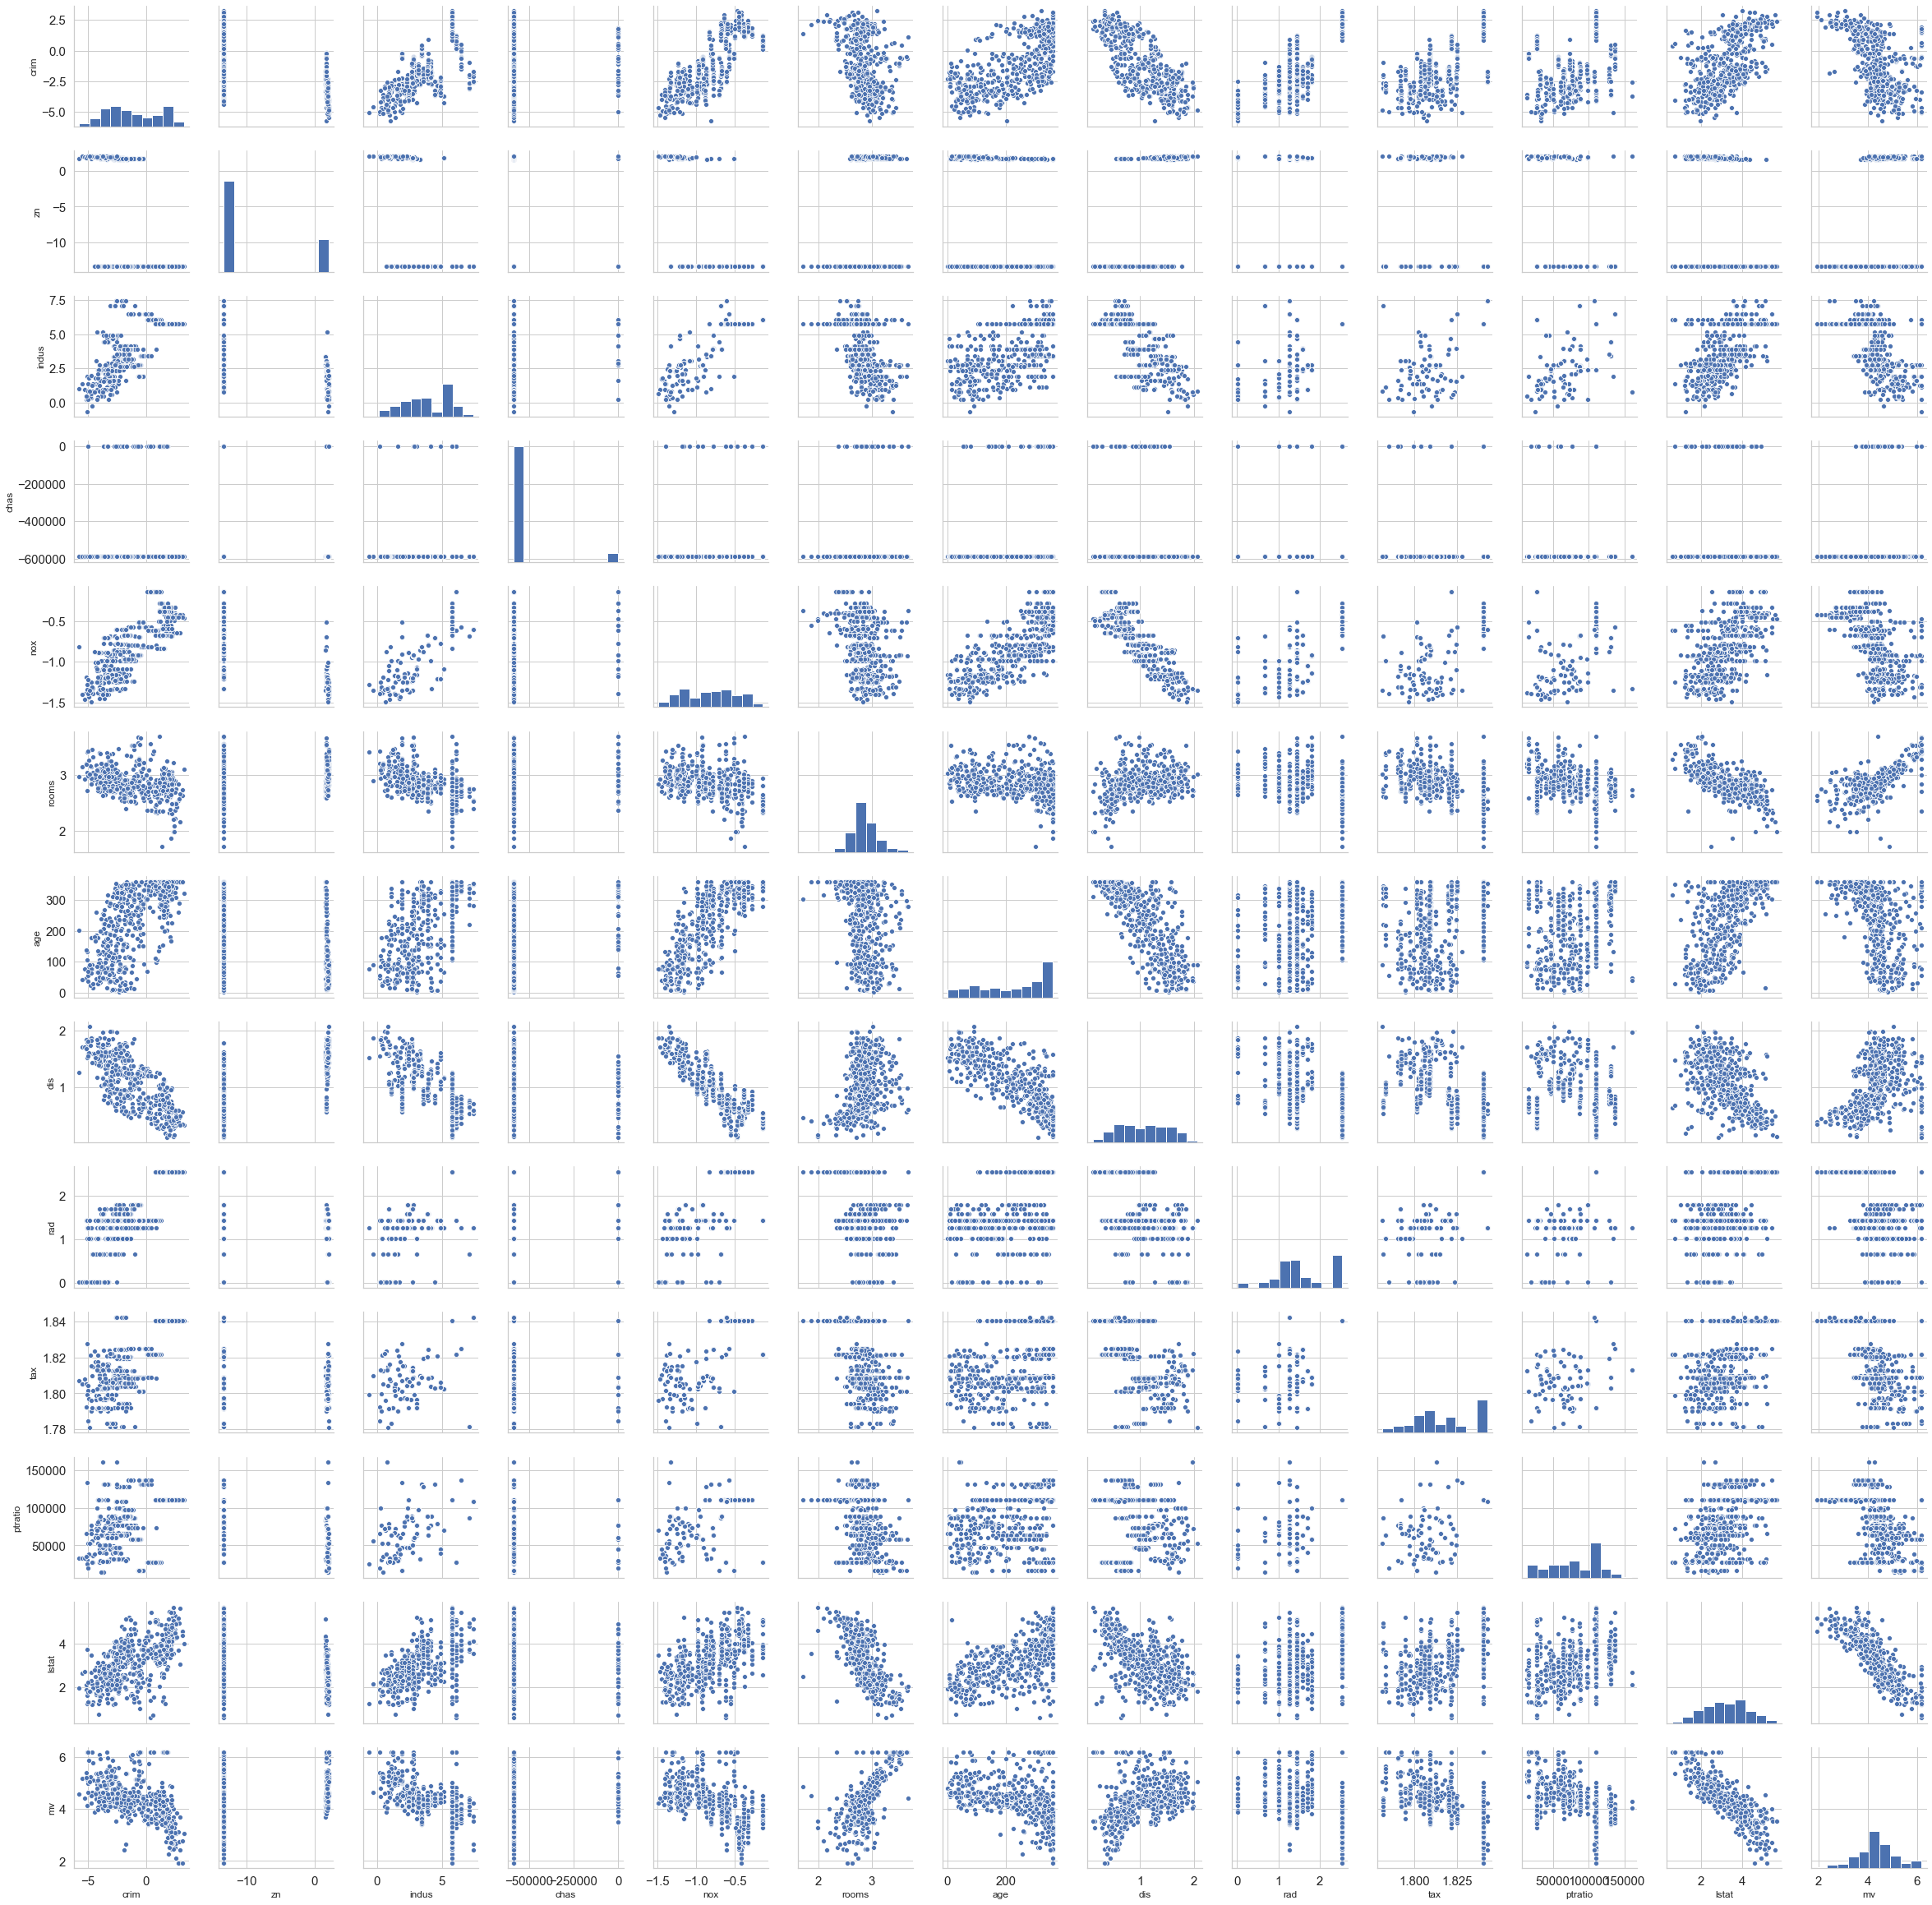

In [92]:
sns.pairplot(boston_df2, diag_kind='hist')

Use scaler to make everythiing with 0 and 1 using min max scaler

In [93]:
#scale data by min max scaler
boston_df3=boston_df2.transform(lambda x: (x - x.min()) / (x.max() - x.min()))

Make histogram matrix and as you can see everything is within 0 and 1.

array([[<AxesSubplot:title={'center':'age'}>,
        <AxesSubplot:title={'center':'chas'}>,
        <AxesSubplot:title={'center':'crim'}>,
        <AxesSubplot:title={'center':'dis'}>],
       [<AxesSubplot:title={'center':'indus'}>,
        <AxesSubplot:title={'center':'lstat'}>,
        <AxesSubplot:title={'center':'mv'}>,
        <AxesSubplot:title={'center':'nox'}>],
       [<AxesSubplot:title={'center':'ptratio'}>,
        <AxesSubplot:title={'center':'rad'}>,
        <AxesSubplot:title={'center':'rooms'}>,
        <AxesSubplot:title={'center':'tax'}>],
       [<AxesSubplot:title={'center':'zn'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

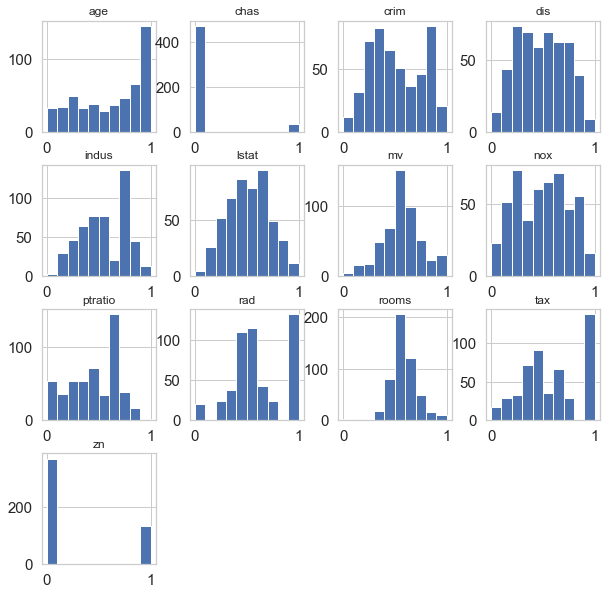

In [94]:
boston_df3.hist(figsize=(10,10))

 Did not have to scale median value of house variable

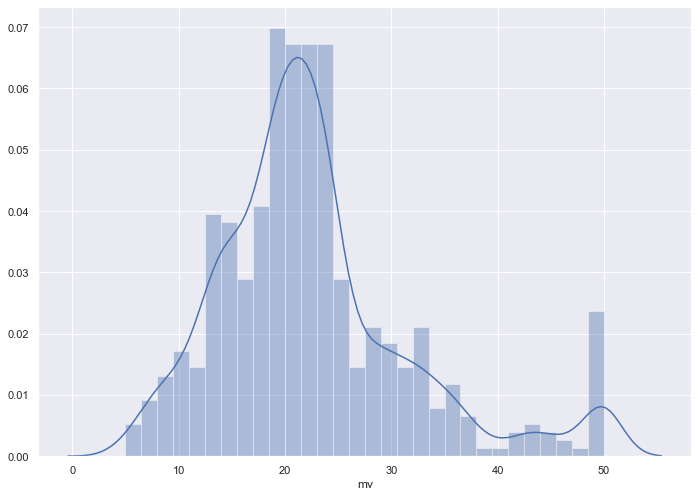

In [95]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.distplot(boston_Target['mv'], bins=30)
plt.show()

See data scaled and transformed and perform tradition summary statistics; move target variable to front

In [100]:
cols = boston_df3.columns.tolist()
cols = cols[-1:] + cols[:-1]
boston_df4=boston_df3[cols]
boston_df4.describe(include="all")

,mv,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,0.566816,0.518606,0.261061,0.562812,0.069170,0.490420,0.577607,0.625279,0.485270,0.625027,0.581265,0.461663,0.517794
std,0.184926,0.247164,0.435430,0.232825,0.253994,0.251621,0.129442,0.315506,0.229684,0.260145,0.280933,0.236275,0.200937
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.469326,0.319026,0.000000,0.378568,0.000000,0.249073,0.506588,0.337094,0.297601,0.491579,0.375989,0.298320,0.364902
50%,0.567460,0.476717,0.000000,0.559586,0.000000,0.500909,0.567485,0.707846,0.485207,0.562195,0.511675,0.489371,0.524193
75%,0.644398,0.771394,0.967068,0.796857,0.000000,0.678615,0.643218,0.920638,0.683853,1.000000,0.965644,0.659680,0.667866
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Make correlation heat map

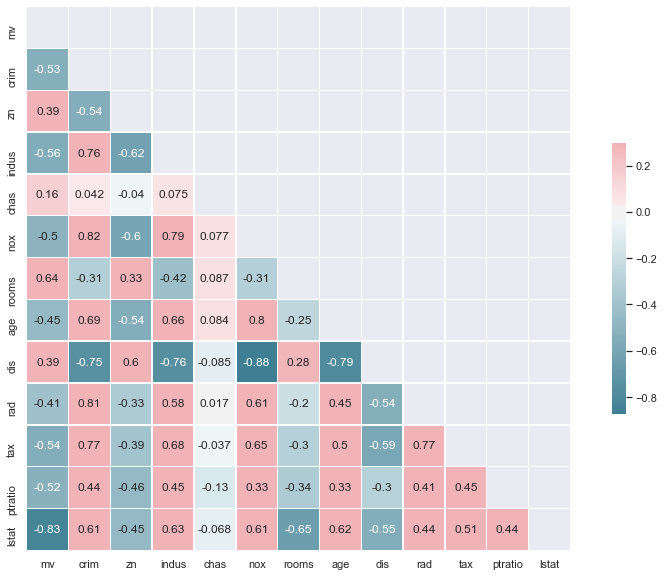

In [101]:
#check correlations
plt.figure(figsize=(15,10))
corr=boston_df4.corr(method='pearson')
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, cmap=sns.diverging_palette(220, 10, as_cmap=True), annot=True, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

In [98]:
boston_df6=boston_df4.copy()
boston_df5 = boston_df4

See features scaled and see their dot graph

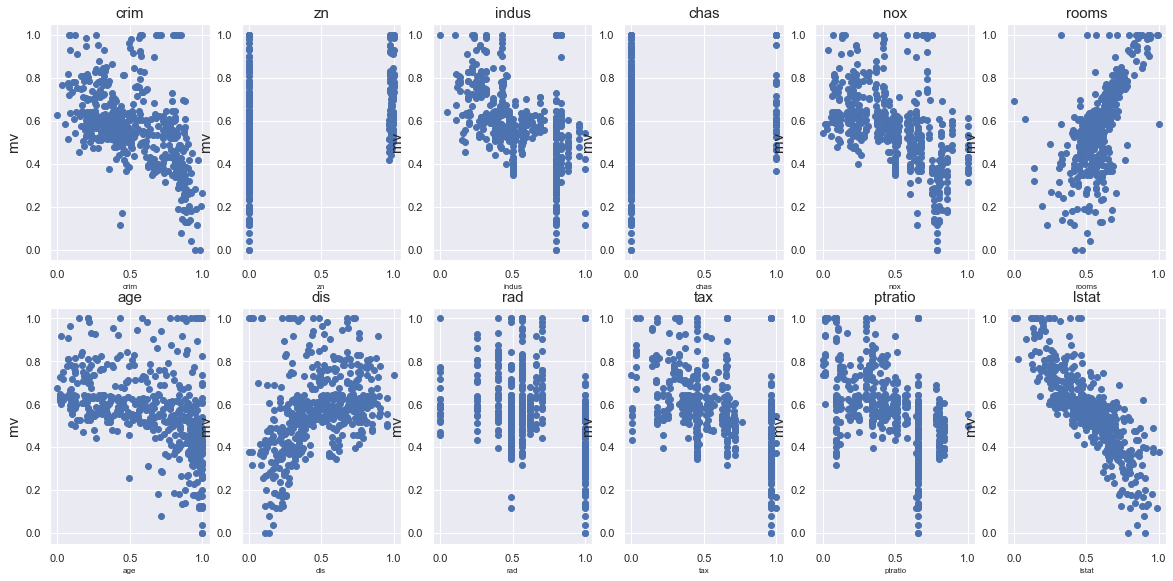

In [99]:
features = boston_df5.drop('mv', 1).columns
target = boston_df5['mv']
plt.figure(figsize=(20,20))
for index, feature_name in enumerate(features):
    plt.subplot(4,len(features)/2, index+1)
    plt.scatter(boston_df5[feature_name], target)
    plt.title(feature_name, fontsize=15)
    plt.xlabel(feature_name, fontsize=8)
    plt.ylabel('mv', fontsize=15)

Drop taget variable since we already have it save in it's own df

In [102]:
featuresdf = boston_df5.drop('mv', 1)
featuresdf

,crim,zn,indus,chas,nox,rooms,age,dis,rad,tax,ptratio,lstat
0,0.000000,0.974993,0.206111,0.0,0.500909,0.634505,0.559560,0.587469,0.000000,0.425166,0.128875,0.266577
1,0.163141,0.000000,0.462097,0.0,0.313594,0.606602,0.725265,0.666469,0.257546,0.251248,0.339415,0.451500
2,0.163042,0.000000,0.462097,0.0,0.313594,0.741634,0.512140,0.666469,0.257546,0.251248,0.339415,0.207913
3,0.186434,0.000000,0.195938,0.0,0.278772,0.709345,0.345103,0.745024,0.397197,0.170949,0.443891,0.125618
4,0.294254,0.000000,0.195938,0.0,0.278772,0.735110,0.434788,0.745024,0.397197,0.170949,0.443891,0.286011
...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.280213,0.000000,0.631565,0.0,0.579388,0.637743,0.605624,0.372463,0.000000,0.357527,0.798991,0.470001
502,0.233660,0.000000,0.631565,0.0,0.579388,0.550977,0.697939,0.336446,0.000000,0.357527,0.798991,0.449354
503,0.275852,0.000000,0.631565,0.0,0.579388,0.705515,0.880112,0.312006,0.000000,0.357527,0.798991,0.302419
504,0.360297,0.000000,0.631565,0.0,0.579388,0.673573,0.857906,0.355971,0.000000,0.357527,0.798991,0.343623


In [103]:
#remove target and keep all features independent variables to train on
X = featuresdf

In [104]:
# Save target in Y
Y = boston_Target['mv']

Run initial model with Ordinary Least Squares Linear Regression befor splitting.

In [107]:
model=sm.OLS(Y, X)

In [108]:
#save learned algorithm
results=model.fit()

Saw R^2 is pretty high means it overfits to existing data

In [109]:
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                     mv   R-squared (uncentered):                   0.947
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              742.2
Date:                Sat, 26 Sep 2020   Prob (F-statistic):                   5.91e-307
Time:                        15:39:19   Log-Likelihood:                         -1587.5
No. Observations:                 506   AIC:                                      3199.
Df Residuals:                     494   BIC:                                      3250.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Train with all features involved 

In [311]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [312]:
print(X_train.shape) 
print(X_test.shape) 
print(y_train.shape) 
print(y_test.shape)

(404, 5)
(102, 5)
(404,)
(102,)


In [313]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

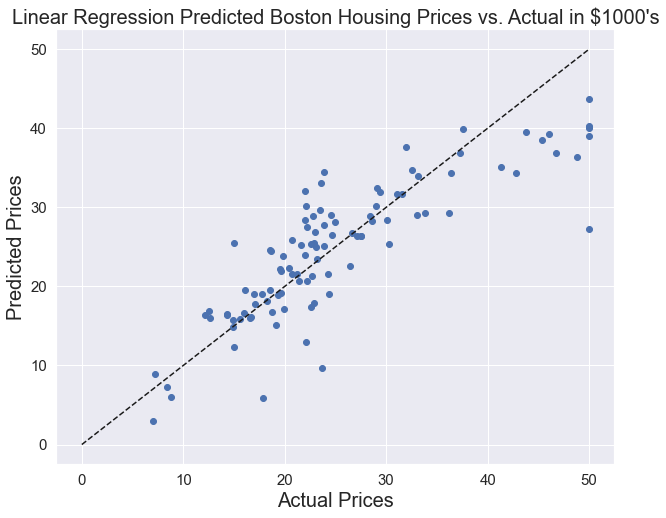

In [314]:

plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [315]:
print("Linear Regression R_squared = ",lrm.score(X,Y)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.745380537683715
Linear Regression RMSE =  5.467651399337476


In [316]:
print(lrm.coef_)
print(lrm.intercept_)

[ -6.72941907  14.75574563 -15.55395268  -5.81938856 -31.24608641]
44.32842703019563


In [317]:
rrm = Ridge()

# Fit data on to the model
rrm.fit(X_train, y_train)

# Predict
y_predicted_rrm = rrm.predict(X_test)

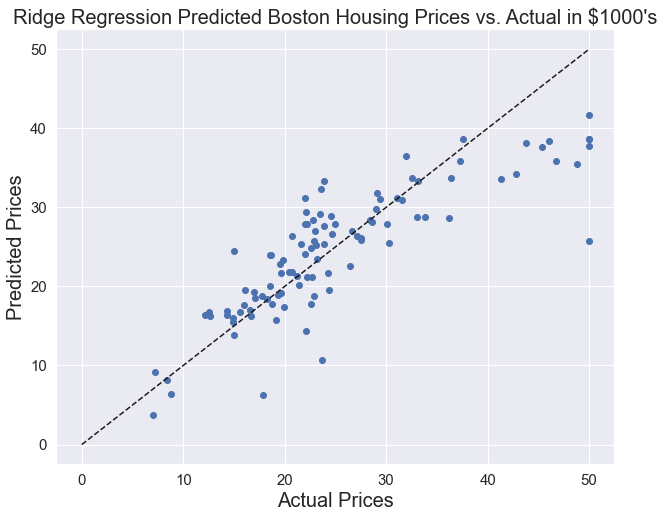

In [318]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_rrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Ridge Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [319]:
print("Ridge Regression R_squared = ",rrm.score(X_train,y_train)) 
pred= rrm.predict(X_train)
rmse = sqrt(mean_squared_error(pred, y_train))
print('Ridge Regression RMSE = ', rmse)

Ridge Regression R_squared =  0.7449766835542215
Ridge Regression RMSE =  4.429603877876231


In [320]:
print(rrm.coef_)
print(rrm.intercept_)

[ -5.01097825  14.23731594 -12.01384638  -5.94549676 -28.53116788]
40.70225192317135


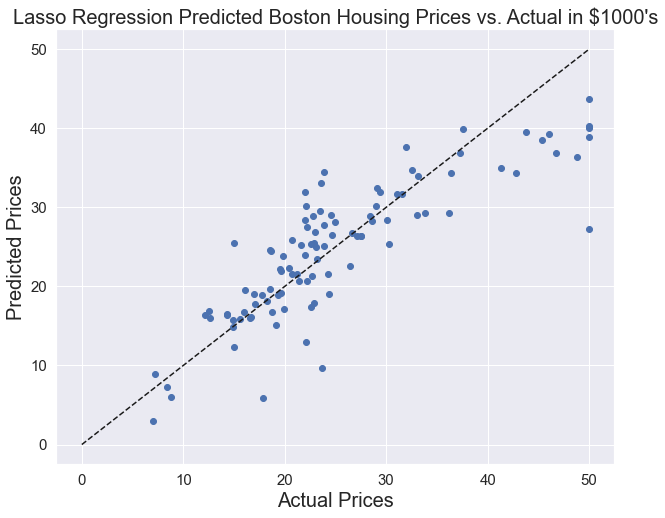

In [321]:
larm = Lasso(alpha=0.001)

# Fit data on to the model
larm.fit(X_train, y_train)

# Predict
y_predicted_larm = larm.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_larm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Lasso Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [183]:
print("Lasso Regression R_squared = ",larm.score(X_train,y_train)) 
pred= larm.predict(X_train)
rmse = sqrt(mean_squared_error(pred, y_train))
print('Lasso Regression RMSE = ', rmse)

Lasso Regression R_squared =  0.7868979467222679
Lasso Regression RMSE =  0.0876389329569984


In [122]:
print(larm.coef_)
print(larm.intercept_)

[  0.45923068   0.3394121   -3.14057602   2.08418907  -8.27231794
  11.46389417   2.57625817 -14.8138363    3.68292213  -5.94886099
  -4.68767432 -30.41608133]
45.836938595495226


In [322]:
enrm = ElasticNet(alpha=0.001)

# Fit data on to the model
enrm.fit(X_train, y_train)

# Predict
y_predicted_enrm = enrm.predict(X_test)

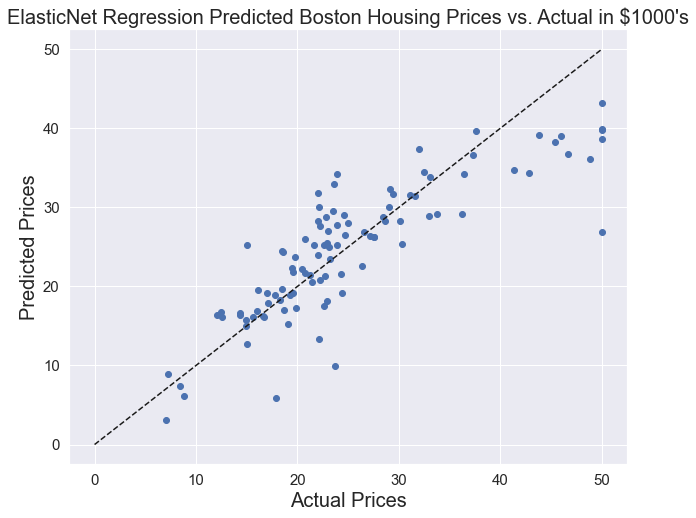

In [323]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_enrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("ElasticNet Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [192]:

print("ElasticNet Regression R_squared = ",enrm.score(X_train,y_train)) 
pred= enrm.predict(X_train)
rmse = sqrt(mean_squared_error(pred, y_train))
print('ElasticNet Regression RMSE = ', rmse)

ElasticNet Regression R_squared =  0.794496153744055
ElasticNet Regression RMSE =  0.08606235807161436


In [193]:
print(enrm.coef_)
print(enrm.intercept_)

[-0.          0.00810155 -0.02070781  0.05155511 -0.09151503  0.15319688
  0.04944581 -0.17060001  0.         -0.1375878  -0.09957594 -0.6077883 ]
1.0153843628078882


In [127]:
model_data=boston_df6.values

In [128]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ]

In [129]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------

In [130]:
cv_results_df.head(10)

,Linear_Regression,Ridge_Regression,Lasso_Regression,ElasticNet_Regression
0,0.060632,0.094503,0.067733,0.061043
1,0.064451,0.081897,0.061343,0.063664
2,0.074057,0.059136,0.044540,0.053263
3,0.075747,0.178059,0.141380,0.120119
4,0.087041,0.141569,0.117210,0.107527
5,0.095296,0.156452,0.145455,0.122087
6,0.069371,0.081946,0.080353,0.081682
7,0.207578,0.244361,0.209325,0.202495
8,0.122983,0.172372,0.160443,0.141570
9,0.120922,0.098219,0.080052,0.084045


Now we want to same thing with some columns dropped with values higher than 0.05 and variables that involve colinearlity but including nox

In [294]:
X = featuresdf

In [295]:
columns = ['chas', 'crim', 'indus', 'age', 'ptratio', 'zn', 'rad']
X = X.drop(columns = columns)

In [296]:
# Split up training and test sets as before

In [297]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.20, random_state = 10)

In [298]:
lrm = LinearRegression()

# Fit data on to the model
lrm.fit(X_train, y_train)

# Predict
y_predicted_lrm = lrm.predict(X_test)

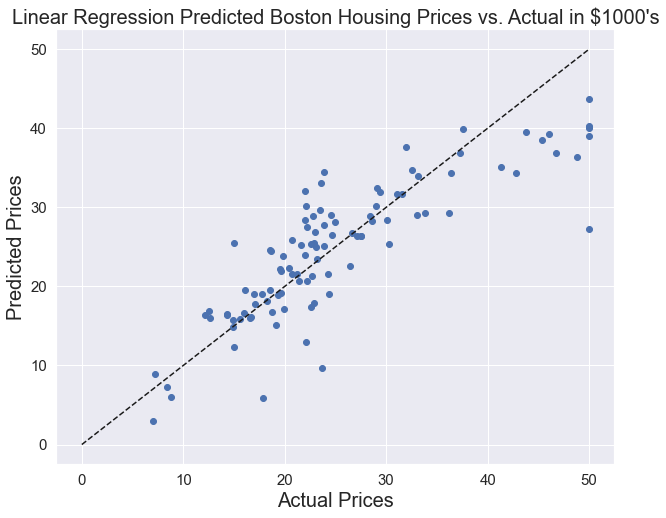

In [299]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_lrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Linear Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [300]:
print("Linear Regression R_squared = ",lrm.score(X_test,y_test)) 
pred= lrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Linear Regression RMSE = ', rmse)

Linear Regression R_squared =  0.7122013385206094
Linear Regression RMSE =  5.467651399337476


In [301]:
print(lrm.coef_)
print(lrm.intercept_)

[ -6.72941907  14.75574563 -15.55395268  -5.81938856 -31.24608641]
44.32842703019563


In [302]:
rrm = Ridge()

# Fit data on to the model
rrm.fit(X_train, y_train)

# Predict
y_predicted_rrm = rrm.predict(X_test)

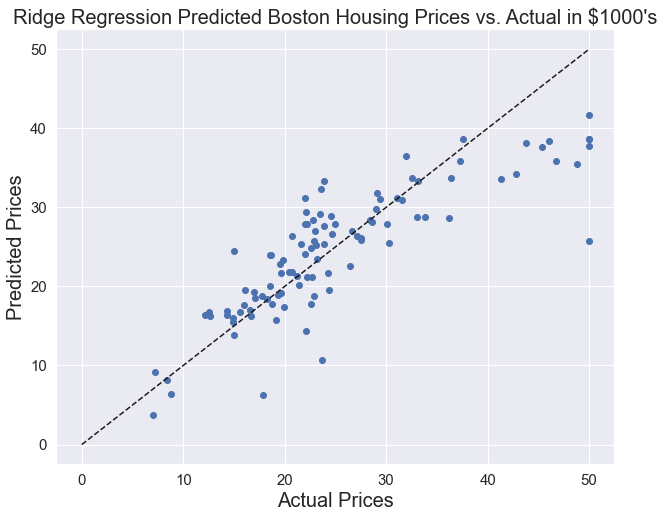

In [303]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_rrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Ridge Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [304]:
print("Ridge Regression R_squared = ",rrm.score(X_test,y_test)) 
pred= rrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Ridge Regression RMSE = ', rmse)

Ridge Regression R_squared =  0.702881198592011
Ridge Regression RMSE =  5.555478866466305


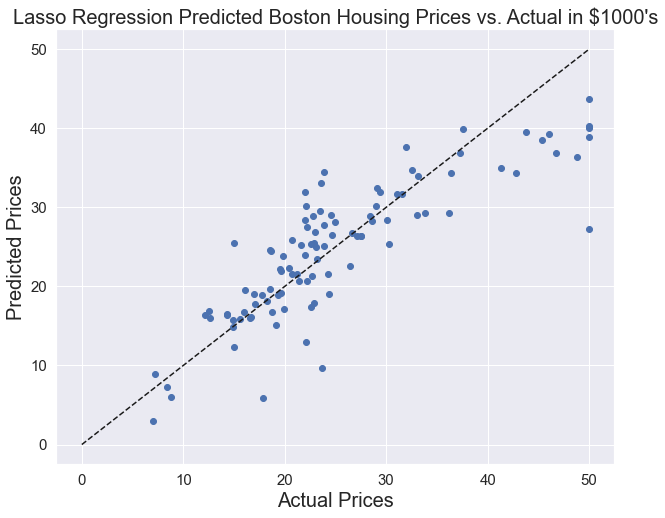

In [305]:
larm = Lasso(alpha=0.001)

# Fit data on to the model
larm.fit(X_train, y_train)

# Predict
y_predicted_larm = larm.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test,y_predicted_larm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("Lasso Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [306]:
print("Lasso Regression R_squared = ",larm.score(X_test,y_test)) 
pred= larm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('Lasso Regression RMSE = ', rmse)

Lasso Regression R_squared =  0.711962449925965
Lasso Regression RMSE =  5.4699201531575685


In [307]:
print(rrm.coef_)
print(rrm.intercept_)

[ -5.01097825  14.23731594 -12.01384638  -5.94549676 -28.53116788]
40.70225192317135


In [308]:
enrm = ElasticNet(alpha=0.001)

# Fit data on to the model
enrm.fit(X_train, y_train)

# Predict
y_predicted_enrm = enrm.predict(X_test)

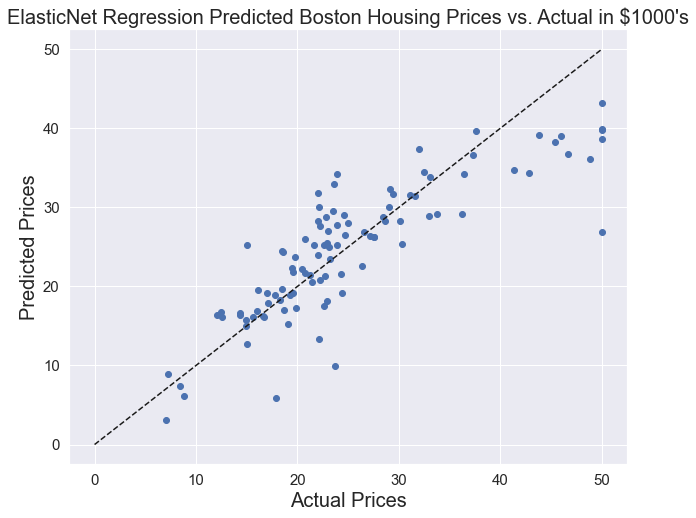

In [309]:
plt.figure(figsize=(10,8))
plt.scatter(y_test, y_predicted_enrm)
plt.plot([0, 50], [0, 50], '--k')
plt.axis('tight')
plt.ylabel('Predicted Prices', fontsize=20);
plt.xlabel('Actual Prices', fontsize=20);
plt.title("ElasticNet Regression Predicted Boston Housing Prices vs. Actual in $1000's", fontsize=20)

plt.rc('xtick', labelsize=15)
plt.rc('ytick', labelsize=15)

plt.show()

In [310]:

print("ElasticNet Regression R_squared = ",enrm.score(X_test,y_test)) 
pred= enrm.predict(X_test)
rmse = sqrt(mean_squared_error(pred, y_test))
print('ElasticNet Regression RMSE = ', rmse)

ElasticNet Regression R_squared =  0.710867081683976
ElasticNet Regression RMSE =  5.480310970838724


In [293]:
print(enrm.coef_)
print(enrm.intercept_)

[ -6.77126923  14.18099508 -14.69867797   2.80398453  -7.62461321
 -30.70441191]
43.269250791572844


In [256]:
model_data=boston_df6.values

In [257]:
# Seed value for random number generators to obtain reproducible results
RANDOM_SEED = 1

# The model input data outside of the modeling method calls
names = ['Linear_Regression', 'Ridge_Regression', 'Lasso_Regression', 'ElasticNet_Regression']

# Specify the set of regression models being evaluated (we set normalize=False because we have standardized above)
regressors = [LinearRegression(fit_intercept = True, normalize = False), 
              Ridge(alpha = 75, solver = 'cholesky', fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              Lasso(alpha = 0.01, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ElasticNet(alpha = 0.01, l1_ratio = 0.5, max_iter=10000, tol=0.01, fit_intercept = True, normalize = False, random_state = RANDOM_SEED),
              ]

In [258]:
# Establish number of cross folds employed for cross-validation
N_FOLDS = 10

# Setup numpy array for storing results
cv_results = np.zeros((N_FOLDS, len(names)))

# Initiate splitting process
kf = KFold(n_splits = N_FOLDS, shuffle=False, random_state = RANDOM_SEED)

# Check the splitting process by looking at fold observation counts
index_for_fold = 0  # Fold count initialized 
for train_index, test_index in kf.split(model_data):
    print('\nFold index:', index_for_fold, '---------------------------------------------------------------------------------------')

# The structure of modeling data for this study has the response variable coming first and explanatory variables later          
# so 1:model_data.shape[1] slices for explanatory variables and 0 is the index for the response variable    
    X_train = model_data[train_index, 1:model_data.shape[1]]
    X_test = model_data[test_index, 1:model_data.shape[1]]
    y_train = model_data[train_index, 0]
    y_test = model_data[test_index, 0]   

    index_for_method = 0  # Method count initialized
    for name, reg_model in zip(names, regressors):
        reg_model.fit(X_train, y_train)  # Fit on the train set for this fold
 
        # Evaluate on the test set for this fold
        y_test_predict = reg_model.predict(X_test)
        fold_method_result = sqrt(mean_squared_error(y_test, y_test_predict))
        cv_results[index_for_fold, index_for_method] = fold_method_result
        index_for_method += 1
  
    index_for_fold += 1

cv_results_df = pd.DataFrame(cv_results)
cv_results_df.columns = names

print('\n---------------------------------------------------------------------------------------')
print('Average results from ', N_FOLDS, '-fold cross-validation\n',
      'in standardized units (mean 0, standard deviation 1)\n',
      '\nMethod               Root mean-squared error', sep = '')    
print(cv_results_df.mean())


Fold index: 0 ---------------------------------------------------------------------------------------

Fold index: 1 ---------------------------------------------------------------------------------------

Fold index: 2 ---------------------------------------------------------------------------------------

Fold index: 3 ---------------------------------------------------------------------------------------

Fold index: 4 ---------------------------------------------------------------------------------------

Fold index: 5 ---------------------------------------------------------------------------------------

Fold index: 6 ---------------------------------------------------------------------------------------

Fold index: 7 ---------------------------------------------------------------------------------------

Fold index: 8 ---------------------------------------------------------------------------------------

Fold index: 9 ----------------------------------------------------------